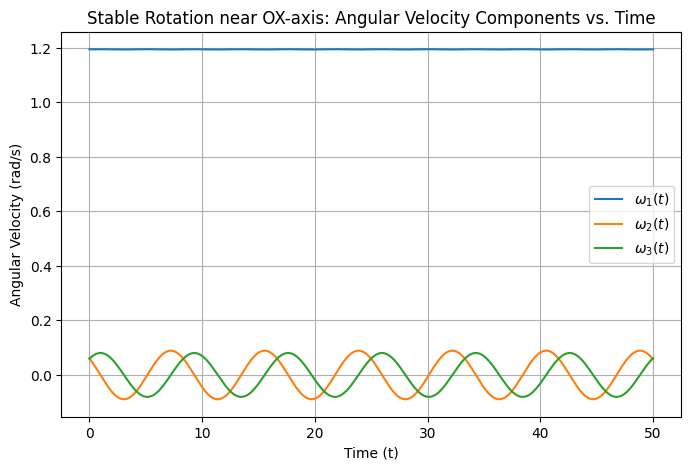

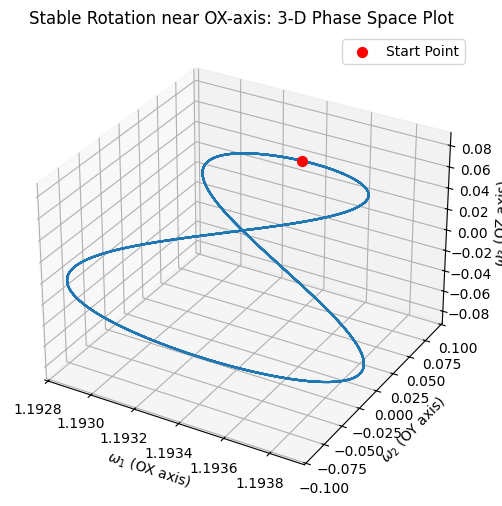

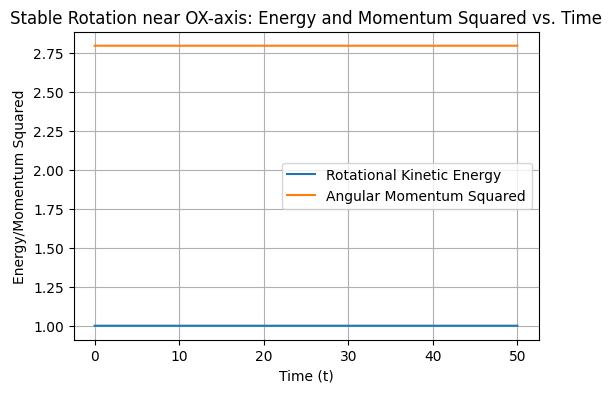

Energy Error: 4.762907845901054e-09
Momentum Squared Error: 8.428651998571013e-09


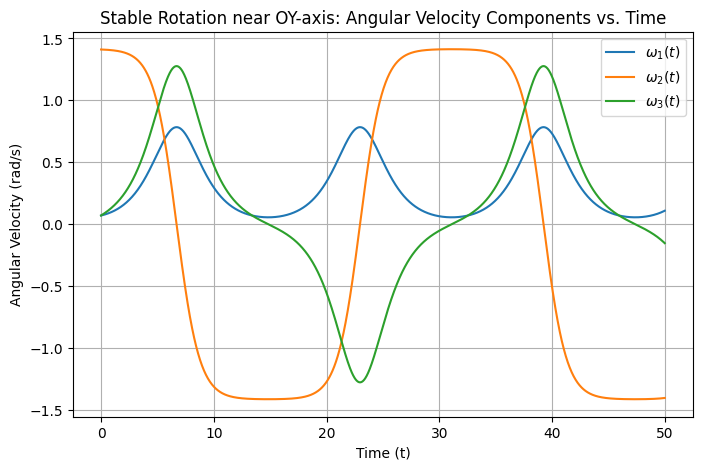

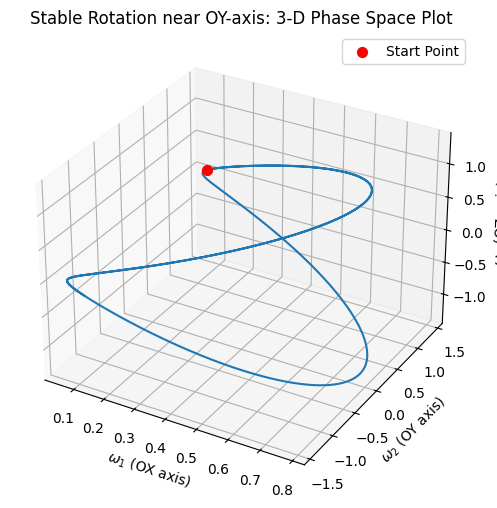

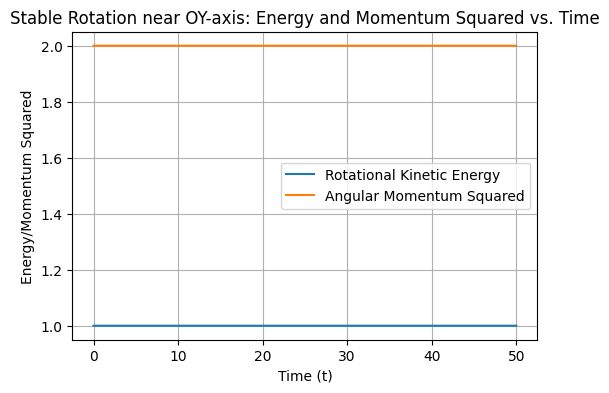

Energy Error: 2.119058151173192e-08
Momentum Squared Error: 4.173916190453042e-08


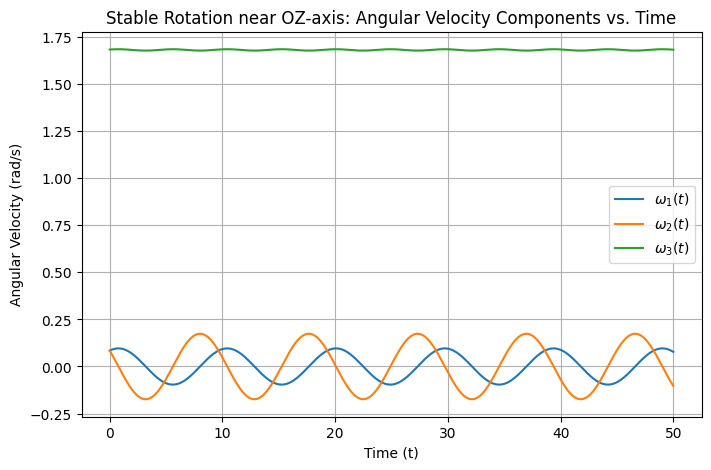

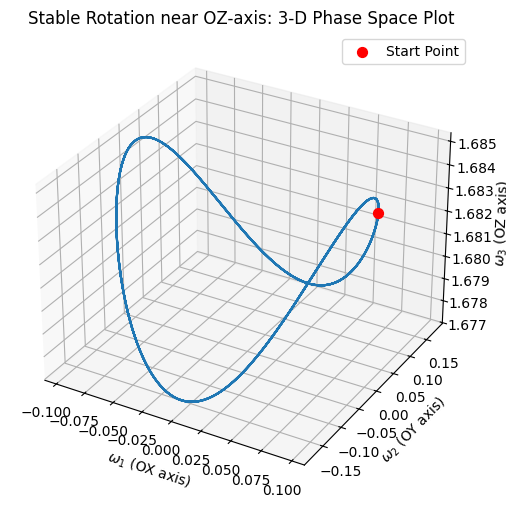

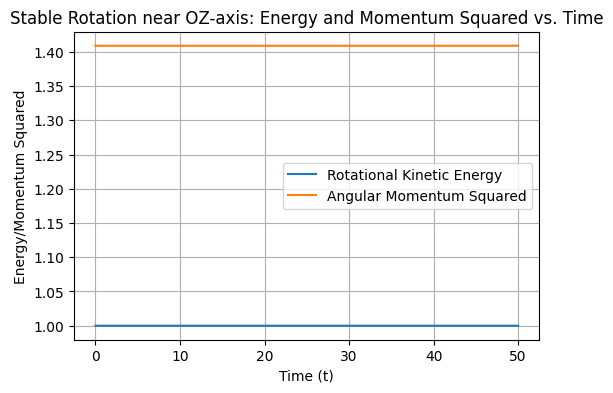

Energy Error: 9.347417950777981e-09
Momentum Squared Error: 2.1062926514048286e-08


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def euler_equations(t, w, params):
    '''
    Defines the system of differential equations for a rigid body.
    '''
    A, B, C = params
    w1, w2, w3 = w
    dw1dt = (B - C) / A * w2 * w3
    dw2dt = (C - A) / B * w3 * w1
    dw3dt = (A - B) / C * w1 * w2
    return [dw1dt, dw2dt, dw3dt]

def calculate_energy(w, params):
    '''
    Calculates the rotational kinetic energy (E).
    '''
    A, B, C = params
    w1, w2, w3 = w
    return 0.5 * (A * w1**2 + B * w2**2 + C * w3**2)

def angular_momentum_sq(w, params):
    '''
    Calculates the angular momentum squared (H^2).
    '''
    A, B, C = params
    w1, w2, w3 = w
    return (A * w1)**2 + (B * w2)**2 + (C * w3)**2

def scale_initial_velocity(w_input, params):
    '''
    Scales an arbitrary initial velocity vector so that the
    rotational kinetic energy E is exactly 1.
    '''
    w_input = np.asarray(w_input, dtype=float)
    initial_energy = calculate_energy(w_input, params)
    scale_factor = 1.0 / np.sqrt(initial_energy)
    return w_input * scale_factor

def solve_equations(params, w_initial, t_span, t_eval):
    '''
    Solves the ODE system.
    '''
    return solve_ivp(
        euler_equations, t_span, w_initial, args=(params,),
        dense_output=True, t_eval=t_eval, rtol=1e-8, atol=1e-8
    )

def plot_simulation_results(t, w_components, params, title_prefix=""):
    '''
    Generates and displays both the time series and phase space plots.
    '''
    w1, w2, w3 = w_components

    plt.figure(figsize=(8, 5))
    plt.plot(t, w1, label=f'$ω_1(t)$')
    plt.plot(t, w2, label=f'$ω_2(t)$')
    plt.plot(t, w3, label=f'$ω_3(t)$')
    plt.title(f"{title_prefix}: Angular Velocity Components vs. Time")
    plt.xlabel("Time (t)")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.legend()
    plt.grid(True)
    plt.show()

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(w1, w2, w3)
    ax.scatter(w1[0], w2[0], w3[0], color='red', s=50, label='Start Point')
    ax.set_title(f"{title_prefix}: 3-D Phase Space Plot")
    ax.set_xlabel(f"$ω_1$ (OX axis)")
    ax.set_ylabel(f"$ω_2$ (OY axis)")
    ax.set_zlabel(f"$ω_3$ (OZ axis)")
    ax.legend()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t, calculate_energy(w_components, params), label="Rotational Kinetic Energy")
    plt.plot(t, angular_momentum_sq(w_components, params), label="Angular Momentum Squared")
    plt.title(f"{title_prefix}: Energy and Momentum Squared vs. Time")
    plt.xlabel("Time (t)")
    plt.ylabel("Energy/Momentum Squared")
    plt.legend()
    plt.grid(True)
    plt.show()

def run_simulation(params, unscaled_w, t_span, title):
    '''
    Runs a complete simulation for a given set of unscaled initial conditions.
    '''
    # Scale the initial velocity to ensure E=1
    w_initial = scale_initial_velocity(unscaled_w, params)

    # Solve and plot
    t_eval = np.linspace(t_span[0], t_span[1], 2000)
    solution = solve_equations(params, w_initial, t_span, t_eval)
    plot_simulation_results(solution.t, solution.y, params, title_prefix=title)

    # Check numerical accuracy from energy and momentum
    true_energy = 1.0
    true_momentum_sq = angular_momentum_sq(w_initial, params)
    # Mean value from simulation
    mean_energy = np.mean(calculate_energy(solution.y, params))
    mean_momentum_sq = np.mean(angular_momentum_sq(solution.y, params))
    # Error
    energy_error = np.abs(true_energy - mean_energy)
    momentum_sq_error = np.abs(true_momentum_sq - mean_momentum_sq)
    print(f"Energy Error: {energy_error}")
    print(f"Momentum Squared Error: {momentum_sq_error}")

A = 1.4
B = 1.0
C = 0.7
principal_moments = (A, B, C)
time_span = [0, 50]

# Stable rotation around the OX axis (axis of largest inertia)
# Start with a velocity mostly along the OX axis with small perturbations
unscaled_w_ox = [1.0, 0.05, 0.05]
run_simulation(principal_moments, unscaled_w_ox, time_span, "Stable Rotation near OX-axis")

# Stable rotation around the OY axis (axis of middle inertia)
# Start with a velocity mostly along the OY axis with small perturbations
unscaled_w_oy = [0.05, 1.0, 0.05]
run_simulation(principal_moments, unscaled_w_oy, time_span, "Stable Rotation near OY-axis")

# Stable rotation around the OZ axis (axis of smallest inertia)
# Start with a velocity mostly along the OZ axis with small perturbations
unscaled_w_oz = [0.05, 0.05, 1.0]
run_simulation(principal_moments, unscaled_w_oz, time_span, "Stable Rotation near OZ-axis")

Linearisation near the $OX$ axis with $\omega_1 \approx \sqrt{2E/A}$ and $\omega_2$, $\omega_3$ small:

Substituting these into Euler's equations and ignoring products of small terms, e.g., $\omega_2\omega_3 \approx 0$,
\begin{equation}
    A\dot{\omega}_1 \approx 0 \implies \omega_1 = \text{constant}, \\
    B\dot{\omega}_2 + (A-C)\omega_1\omega_3 \approx 0 \implies \dot{\omega}_2 = -\frac{(A-C)\omega_1\omega_3}{B}, \\
    C\dot{\omega}_3 + (B-A)\omega_1\omega_2 \approx 0 \implies \dot{\omega}_3 = -\frac{(B-A)\omega_1\omega_2}{C}.
\end{equation}

Differentiating the $\dot{\omega}_2$ equation and substituting $\dot{\omega}_3$,
\begin{equation}
    \ddot{\omega}_2 = -\frac{(A-C)\omega_1}{B}\dot{\omega}_3 = -\left[ \frac{(A-C)(A-B)\omega_1^2}{BC} \right] \omega_2
\end{equation}
This is the equation for simple harmonic motion. Since $A > B > C$, both $A-B > 0$ and $A-C > 0$, so the term under the square root is positive, confirming stable oscillatory motion. The period of motion is
\begin{equation}
    T = \frac{2\pi}{\omega_1} \sqrt{\frac{BC}{(A-C)(A-B)}}.
\end{equation}

Linearisation near the $OZ$ axis with $\omega_3 \approx \sqrt{2E/C}$ and $\omega_1$, $\omega_2$ small:

Once again, using Euler equations and ignoring products of small terms,
\begin{equation}
    C\dot{\omega}_3 \approx 0 \implies \omega_3 = \text{constant}, \\
    A\dot{\omega}_1 + (C-B)\omega_3\omega_2 \approx 0 \implies \dot{\omega}_1 = -\frac{(C-B)\omega_3\omega_2}{A}, \\
    B\dot{\omega}_2 + (A-C)\omega_3\omega_1 \approx 0 \implies \dot{\omega}_2 = -\frac{(A-C)\omega_3\omega_1}{B}.
\end{equation}

Differentiating the $\dot{\omega}_1$ equation and substituting $\dot{\omega}_2$,
\begin{equation}
    \ddot{\omega}_1 = -\frac{(C-B)\omega_3}{A}\dot{\omega}_2 = -\left[ \frac{(C-B)(C-A)\omega_3^2}{AB} \right] \omega_1.
\end{equation}
This is also simple harmonic motion. Since $A > B > C$, $B-C > 0$ and $A-C > 0$ are positive, confirming stable oscillatory motion here as well. The period of motion is
\begin{equation}
    T = \frac{2\pi}{\omega_3} \sqrt{\frac{AB}{(C-B)(C-A)}}
\end{equation}

Linearisation near the $OY$ axis with $\omega_2 \approx \sqrt{2E/C}$ and $\omega_3$, $\omega_1$ small:

Finally, in this case the Euler equations become
\begin{equation}
    B\dot{\omega}_2 \approx 0 \implies \omega_2 = \text{constant}, \\
    C\dot{\omega}_3 + (B-A)\omega_2\omega_1 \approx 0 \implies \dot{\omega}_3 = -\frac{(B-A)\omega_2\omega_1}{C}, \\
    A\dot{\omega}_2 + (A-C)\omega_3\omega_3 \approx 0 \implies \dot{\omega}_1 = -\frac{(C-B)\omega_2\omega_3}{A}.
\end{equation}

The analytic solution is
\begin{equation}
    \ddot{\omega}_3 = -\frac{(B-A)\omega_3}{C}\dot{\omega}_1 = -\left[ \frac{(B-A)(B-C)\omega_2^2}{CA} \right] \omega_3.
\end{equation}

In contrast, since $A > B > C$, we have $B-C > 0$ but $B-A < 0$. The solution to this differential equation is a linear combination of exponential growth and decay, demonstrating instability.

Since there are two regions of qualitatively different motion, there must be a a separatrix or boundary between them. A trajectory lying on this separatrix would represent a critically balanced motion. It would start infinitely close to the unstable $OY$-axis, move away along the boundary, and then asymptotically approach the $OY$-axis as $t \to \infty$.

It is practically impossible to simulate a separatrix trajectory numerically as any numerical error, either from the floating-point representation of the numbers or from the ODE solver approximation, will push the trajectory off the separatrix line. Then the solution will invariably fall into one of the regions of motion.

The separatrix is the trajectory whose energy and angular momentum are exactly the same as for a pure, steady rotation about the unstable intermediate $(OY)$ axis. Consider a state of pure rotation about the $OY$-axis, with $\omega = (0, \omega_2, 0)$. The two conserved quantities for this state are:
\begin{equation}
    E = \frac{1}{2}(A(0)^2 + B\omega_2^2 + C(0)^2) = \frac{B}{2}\omega_2^2, \\
    H^2 = A^2(0)^2 + B^2\omega_2^2 + C^2(0)^2 = B^2\omega_2^2².
\end{equation}
This gives the relation for the critical value of $H$,
\begin{equation}
    H^2 = 2EB,
\end{equation}
which in our case $E = 1$ and $B = 1$ gives $H^2 = 2$.
*   If $H^2 < 2$, then the motion is stable precession around the OX or OZ axis.
*   If $H^2 > 2$, then the motion is the unstable tumbling flip.
*   If $H^2 = 2$, then the motion lies exactly on the separatrix.